## Lab 3.2. Predicting Engagement - Dự đoán khả năng tương tác tiếp thị của KH
#ThanhDuong

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
import pandas as pd


## 1.Load Data

In [5]:
df = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [6]:

df.shape

(9134, 24)

In [7]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## 2.Variable Encoding - Mã hóa các biến

### 2.1.Response Variable: Response 

In [8]:
df['Engaged'] = df['Response'].apply(lambda x: 1 if x == 'Yes' else 0)

In [9]:
df['Engaged'].mean()

0.14320122618786948

### 2.2.Features

In [10]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Engaged
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,0.143201
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.350297
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,0.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,0.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,0.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.000000


In [11]:
continuous_features = [
    'Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
    'Months Since Last Claim', 'Months Since Policy Inception',
    'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount'
]


#### - Creating Dummy Variables - Tạo các biến giả

In [12]:
columns_to_encode = [
    'Sales Channel', 'Vehicle Size', 'Vehicle Class', 'Policy', 'Policy Type', 
    'EmploymentStatus', 'Marital Status', 'Education', 'Coverage'
]

categorical_features = []
for col in columns_to_encode:
    encoded_df = pd.get_dummies(df[col])
    encoded_df.columns = [col.replace(' ', '.') + '.' + x for x in encoded_df.columns]
    
    categorical_features += list(encoded_df.columns)
    
    df = pd.concat([df, encoded_df], axis=1)


#### - Encoding Gender - Mã hóa giới tính

In [13]:
df['Is.Female'] = df['Gender'].apply(lambda x: 1 if x == 'F' else 0)

categorical_features.append('Is.Female')


#### - all features & response - tất cả các thuộc tính và sự phản hồi

In [14]:
all_features = continuous_features + categorical_features
response = 'Engaged'

In [15]:
sample_df = df[all_features + [response]]
sample_df.columns = [x.replace(' ', '.') for x in sample_df.columns]
all_features = [x.replace(' ', '.') for x in all_features]


In [16]:
sample_df.head()


,Customer.Lifetime.Value,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Sales.Channel.Agent,Sales.Channel.Branch,...,Education.Bachelor,Education.College,Education.Doctor,Education.High.School.or.Below,Education.Master,Coverage.Basic,Coverage.Extended,Coverage.Premium,Is.Female,Engaged
0,2763.519279,56274,69,32,5,0,1,384.811147,1,0,...,1,0,0,0,0,1,0,0,1,0
1,6979.535903,0,94,13,42,0,8,1131.464935,1,0,...,1,0,0,0,0,0,1,0,1,0
2,12887.431650,48767,108,18,38,0,2,566.472247,1,0,...,1,0,0,0,0,0,0,1,1,0
3,7645.861827,0,106,18,65,0,7,529.881344,0,0,...,1,0,0,0,0,1,0,0,0,0
4,2813.692575,43836,73,12,44,0,1,138.130879,1,0,...,1,0,0,0,0,1,0,0,0,0


## 3.Training & Testing

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(sample_df[all_features], sample_df[response], test_size=0.3)

In [19]:
sample_df.shape

(9134, 51)

In [20]:
x_train.shape

(6393, 50)

In [21]:
x_test.shape

(2741, 50)

### 3.1.Building RandomForest Model

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5
)


In [24]:
rf_model.fit(X=x_train, y=y_train)


RandomForestClassifier(max_depth=5, n_estimators=200)

#### - Individual Trees - Các cây riêng lẻ

In [25]:
rf_model.estimators_

[DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=556839664),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=868037793),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=320920541),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=2095291469),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1919922348),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=636967364),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=192026503),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=564536350),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=855158005),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=79713890),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1510891008),
 DecisionTree

In [26]:
rf_model.estimators_[0]

DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=556839664)

In [27]:
rf_model.estimators_[0].predict(x_test)[:10]

C:\Users\84973\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
rf_model.estimators_[1].predict(x_test)[:10]

C:\Users\84973\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [29]:
rf_model.estimators_[2].predict(x_test)[:10]

C:\Users\84973\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [30]:
rf_model.estimators_[3].predict(x_test)[:10]

C:\Users\84973\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [31]:
rf_model.estimators_[4].predict(x_test)[:10]

C:\Users\84973\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### - Feature Importances - Tầm quan trọng của các thuộc tính

In [32]:
rf_model.feature_importances_

array([5.89736091e-02, 8.02340016e-02, 5.27127322e-02, 3.06413814e-02,
       4.94424627e-02, 1.11627586e-02, 1.94929335e-02, 7.33869789e-02,
       4.58181477e-02, 6.00631518e-03, 8.45634080e-03, 4.58996202e-03,
       5.65283623e-03, 8.38212944e-03, 9.82221495e-03, 3.73333268e-03,
       7.72355279e-04, 3.09126982e-03, 4.88478299e-03, 6.45114551e-03,
       4.01034351e-03, 5.41472167e-04, 1.50758892e-03, 8.31463639e-04,
       2.15202289e-03, 6.80383639e-04, 1.46428936e-03, 1.50198796e-04,
       4.73619843e-04, 1.88682105e-03, 1.73569694e-03, 1.02450576e-03,
       9.00047722e-04, 2.42502561e-03, 2.09641512e-02, 4.44658589e-03,
       3.30898134e-01, 2.82131470e-02, 4.22135876e-02, 1.30590015e-02,
       1.04731717e-02, 4.04502700e-03, 7.16042073e-03, 4.54934591e-03,
       3.39365851e-03, 7.54682864e-03, 5.48053162e-03, 4.78269540e-03,
       3.05674072e-03, 6.22580166e-03])

In [33]:
feature_importance_df = pd.DataFrame(list(zip(rf_model.feature_importances_, all_features)))
feature_importance_df.columns = ['feature.importance', 'feature']

feature_importance_df.sort_values(by='feature.importance', ascending=False)

,feature.importance,feature
36,0.330898,EmploymentStatus.Retired
1,0.080234,Income
7,0.073387,Total.Claim.Amount
0,0.058974,Customer.Lifetime.Value
2,0.052713,Monthly.Premium.Auto
4,0.049442,Months.Since.Policy.Inception
8,0.045818,Sales.Channel.Agent
38,0.042214,Marital.Status.Divorced
3,0.030641,Months.Since.Last.Claim
37,0.028213,EmploymentStatus.Unemployed


### 3.2.Evaluating Models

#### - Accuracy, Precision, and Recall

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [35]:
in_sample_preds = rf_model.predict(x_train)
out_sample_preds = rf_model.predict(x_test)


In [36]:
print('In-Sample Accuracy: %0.4f' % accuracy_score(y_train, in_sample_preds))
print('Out-of-Sample Accuracy: %0.4f' % accuracy_score(y_test, out_sample_preds))

In-Sample Accuracy: 0.8789
Out-of-Sample Accuracy: 0.8763


In [37]:
print('In-Sample Precision: %0.4f' % precision_score(y_train, in_sample_preds))
print('Out-of-Sample Precision: %0.4f' % precision_score(y_test, out_sample_preds))

In-Sample Precision: 0.9804
Out-of-Sample Precision: 0.9000


In [38]:
print('In-Sample Recall: %0.4f' % recall_score(y_train, in_sample_preds))
print('Out-of-Sample Recall: %0.4f' % recall_score(y_test, out_sample_preds))


In-Sample Recall: 0.1629
Out-of-Sample Recall: 0.1395


#### - ROC & AUC

In [39]:
from sklearn.metrics import roc_curve, auc

In [40]:
in_sample_preds = rf_model.predict_proba(x_train)[:,1]
out_sample_preds = rf_model.predict_proba(x_test)[:,1]

In [41]:
in_sample_fpr, in_sample_tpr, in_sample_thresholds = roc_curve(y_train, in_sample_preds)
out_sample_fpr, out_sample_tpr, out_sample_thresholds = roc_curve(y_test, out_sample_preds)

In [42]:
in_sample_roc_auc = auc(in_sample_fpr, in_sample_tpr)
out_sample_roc_auc = auc(out_sample_fpr, out_sample_tpr)

print('In-Sample AUC: %0.4f' % in_sample_roc_auc)
print('Out-Sample AUC: %0.4f' % out_sample_roc_auc)

In-Sample AUC: 0.8833
Out-Sample AUC: 0.8268


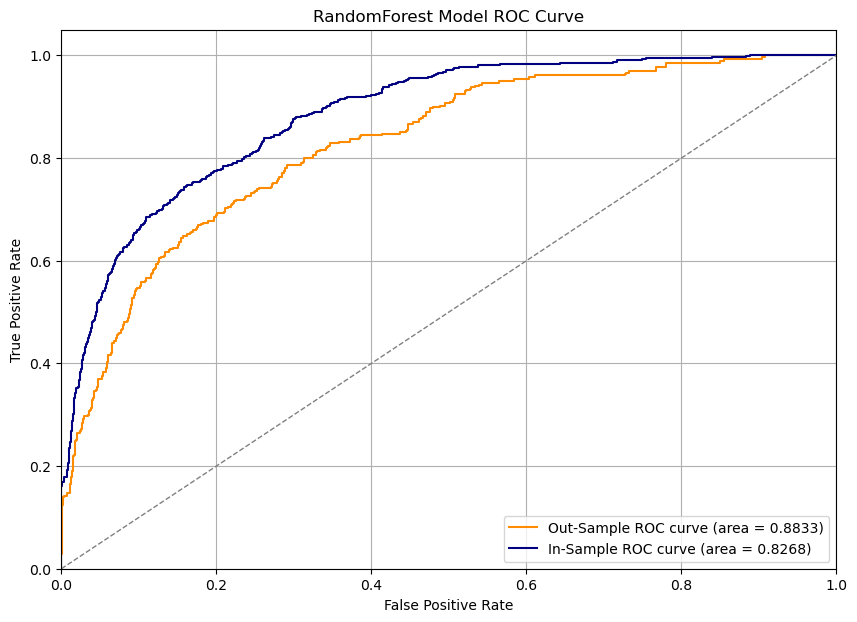

In [43]:
plt.figure(figsize=(10,7))

plt.plot(
    out_sample_fpr, out_sample_tpr, color='darkorange', label='Out-Sample ROC curve (area = %0.4f)' % in_sample_roc_auc
)
plt.plot(
    in_sample_fpr, in_sample_tpr, color='navy', label='In-Sample ROC curve (area = %0.4f)' % out_sample_roc_auc
)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest Model ROC Curve')
plt.legend(loc="lower right")

plt.show()